# Завдання
1. Створіть xls-документ, що містить дані про міста, їх населення, середній дохід жителів, площу території та наявність метрополітену. Кількість записів у документі – 20.
2. За допомогою Plotly візуалізуйте залежності населення міста від його площі та середнього доходу від населення. Помістіть ці графіки на один малюнок.
3. Побудуйте матрицю кореляцій та візуалізуйте її через heatmap.
4. Побудуйте звіти про таблицю за допомогою Sweetviz та Pandas Profiling; напишіть коротке порівняння цих звітів.

## Рішення

1. Створіть xls-документ, що містить дані про міста, їх населення, середній дохід жителів, площу території та наявність метрополітену. Кількість записів у документі – 20.

In [23]:
import numpy as np
import pandas as pd
import plotly.express as px

city_df = pd.read_excel('city.xlsx', index_col=0)
city_df

,City,Metro,Population,Income,Area
0,Miskolc,False,3.136629e+06,3050.472778,258.608591
1,San Francisco,False,1.843130e+06,2621.319966,221.083004
2,Porto,True,4.334452e+06,3617.636775,369.690334
3,Jersey City,False,7.951713e+05,2796.516160,223.388132
4,San Jose,False,1.248192e+06,2915.105966,201.402372
5,Baku,True,1.417427e+06,3596.733670,173.908837
6,Barcelona,True,3.240415e+03,3436.164243,323.158900
7,Budapest,True,3.206485e+06,2774.415061,226.830015
8,Boston,True,1.317553e+06,3314.787047,183.368397
9,Madrid,True,1.931427e+06,3411.301288,170.015829


2. За допомогою Plotly візуалізуйте залежності населення міста від його площі та середнього доходу від населення. Помістіть ці графіки на один малюнок.

In [24]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(
        x=city_df.Area,
        y=city_df.Population,
        mode="markers",
        name='Населення'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=city_df.Population,
        y=city_df.Income,
        mode="markers",
        name='Дохід'
    ),
    row=1, col=2
)
fig.update_xaxes(title='Площа', col=1, row=1)
fig.update_xaxes(title='Населення', col=2, row=1)
fig.update_yaxes(title='Населення', col=1, row=1)
fig.update_yaxes(title='Дохід', col=2, row=1)
fig.update_layout(showlegend=False)
fig.show()

3. Побудуйте матрицю кореляцій та візуалізуйте її через heatmap.

In [25]:
corr_df = city_df.corr(numeric_only=True)
corr_df

,Metro,Population,Income,Area
Metro,1.000000,-0.201926,0.482372,0.129653
Population,-0.201926,1.000000,-0.029368,0.023652
Income,0.482372,-0.029368,1.000000,0.113842
Area,0.129653,0.023652,0.113842,1.000000


In [26]:
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = corr_df.columns,
        y = corr_df.index,
        z = np.array(corr_df),
        text=corr_df.values,
        texttemplate='%{text:.2f}'
    )
)
fig.show()

4. Побудуйте звіти про таблицю за допомогою Sweetviz та Pandas Profiling; напишіть коротке порівняння цих звітів.

                                             |          | [  0%]   00:00 -> (? left)


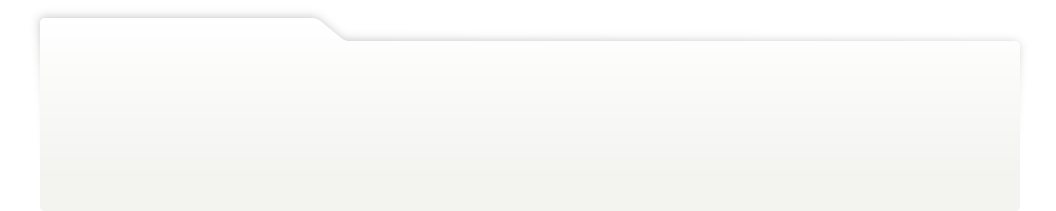
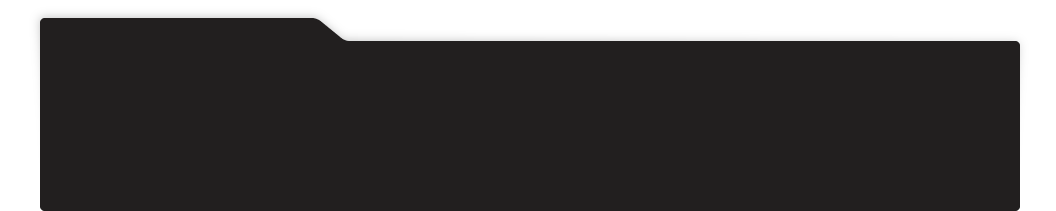
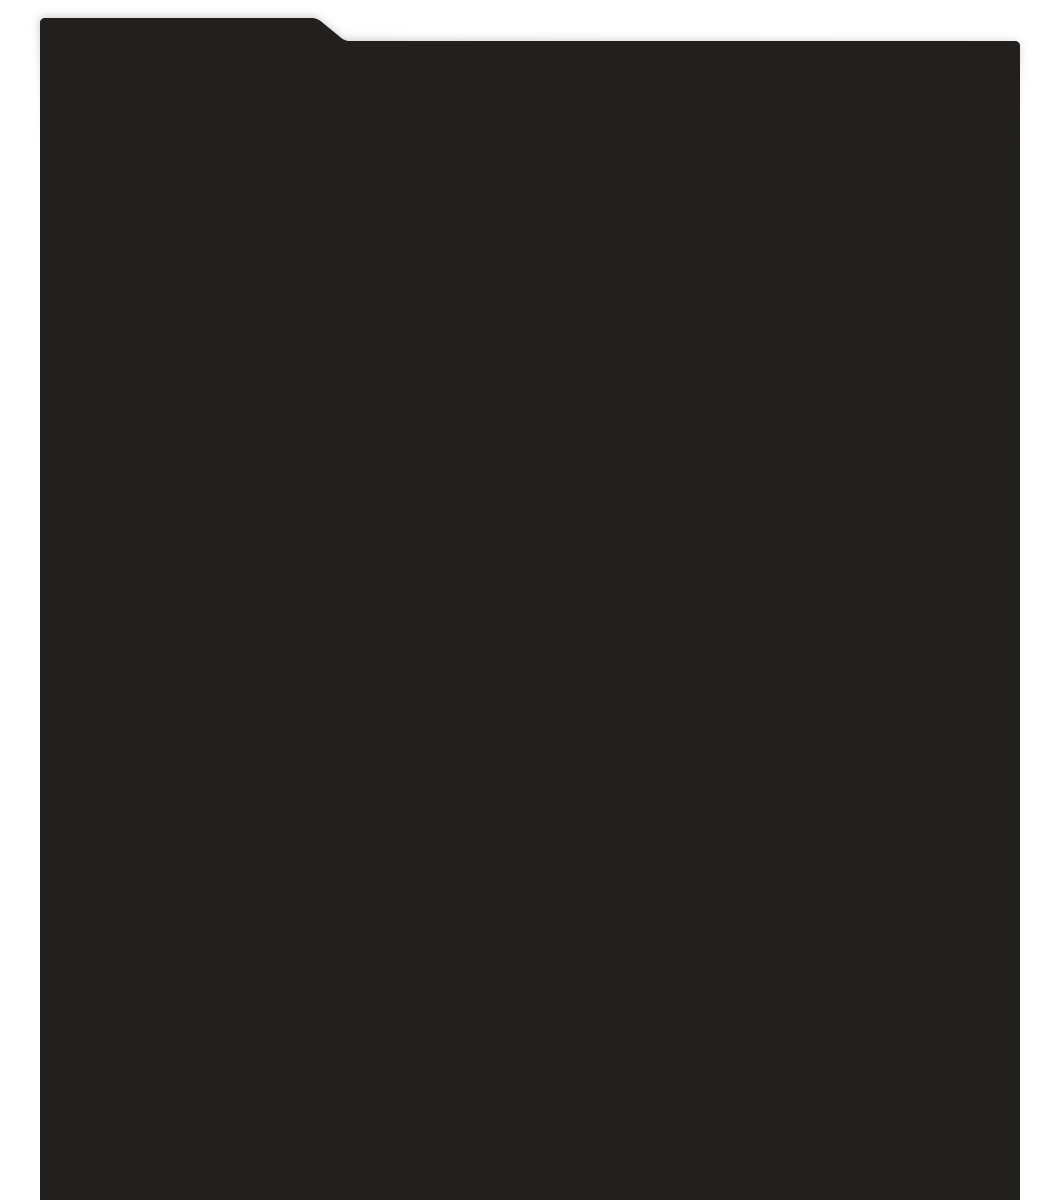
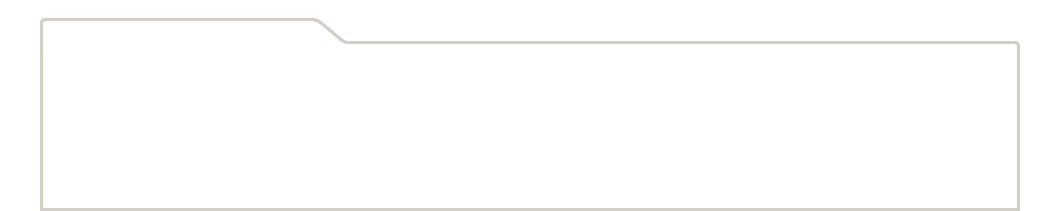
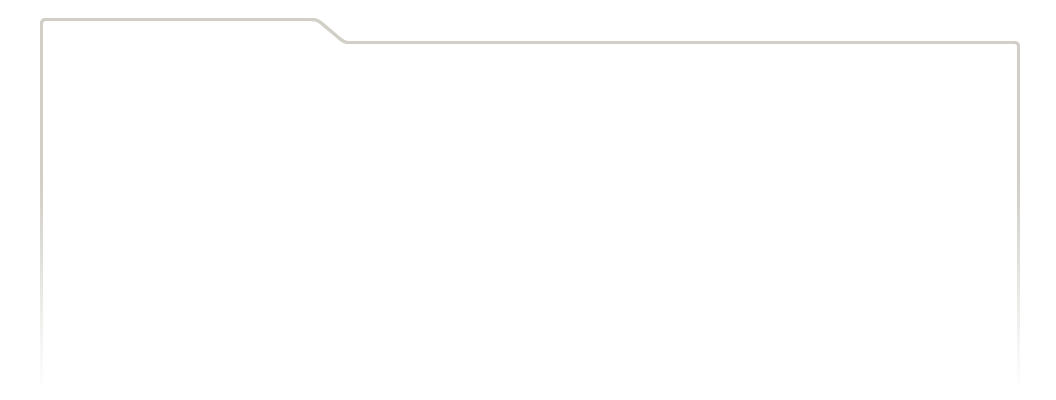
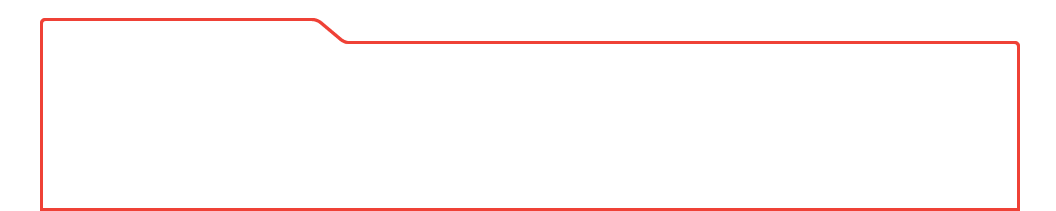
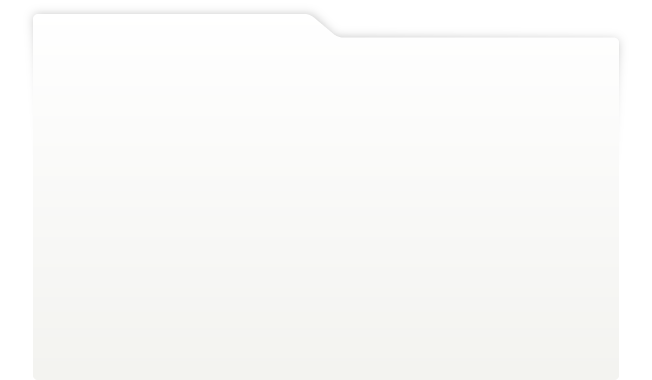
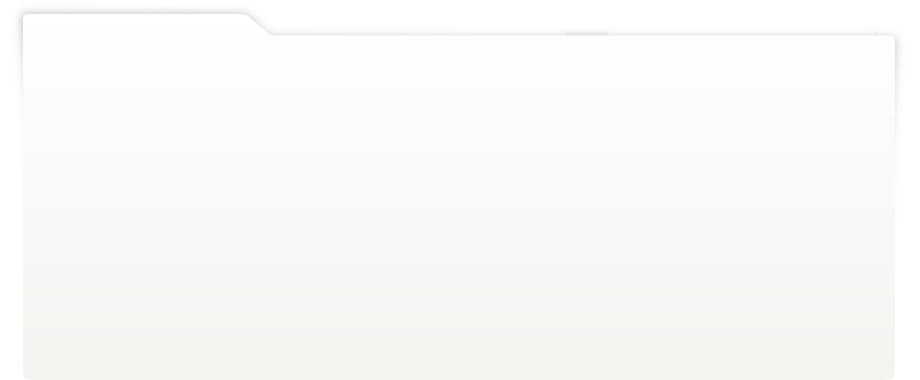
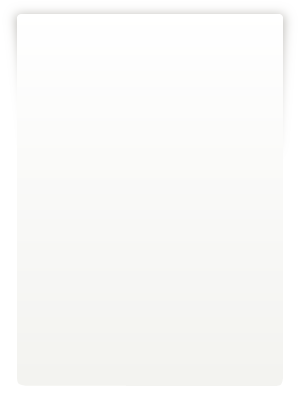
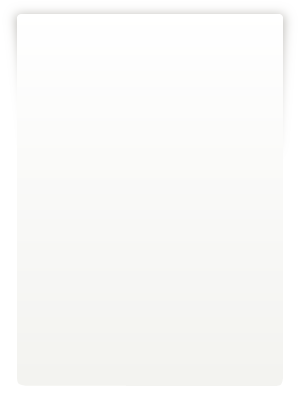
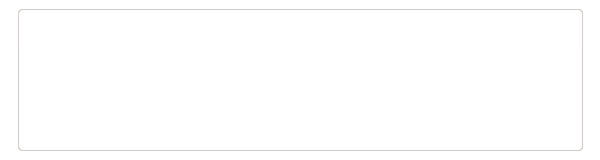
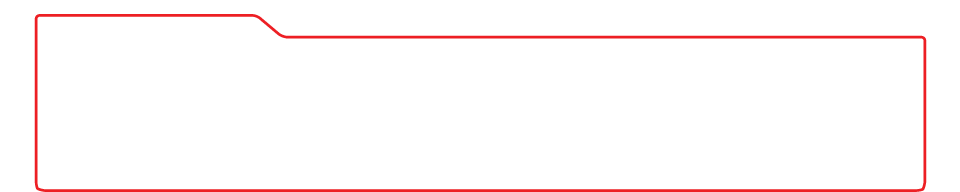
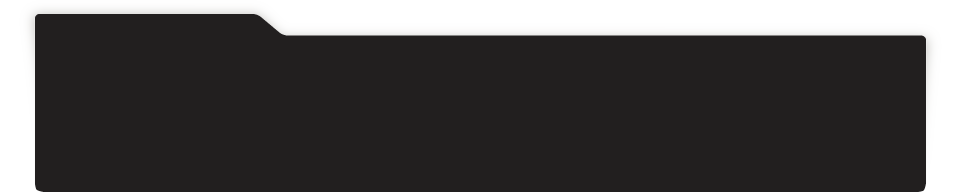
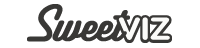
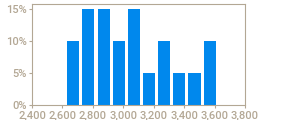
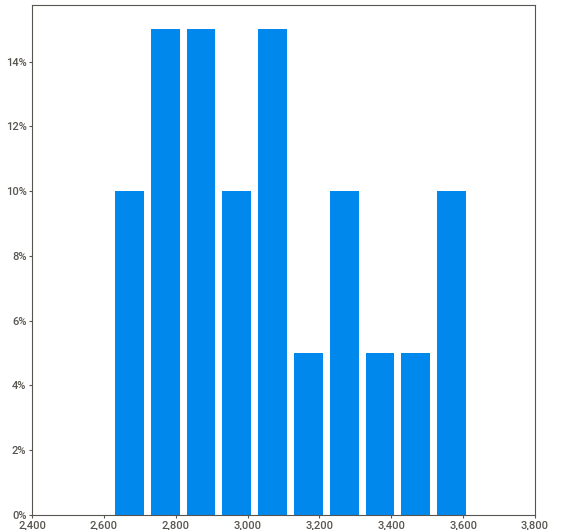
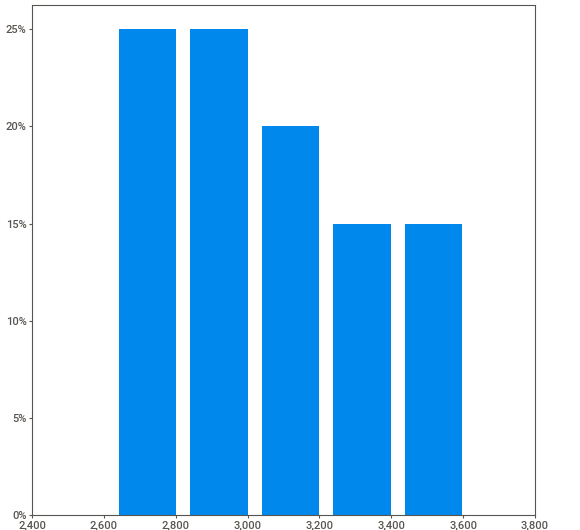
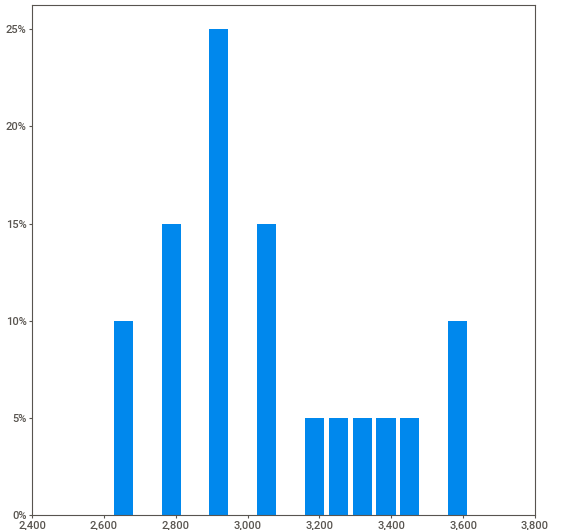
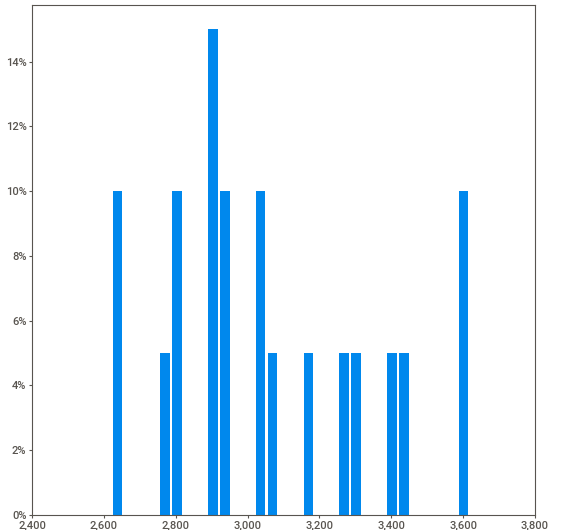
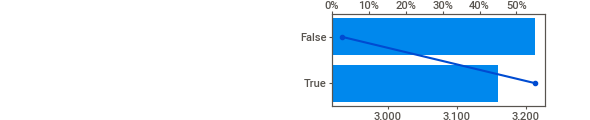
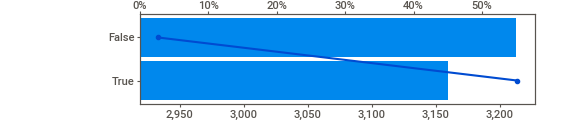
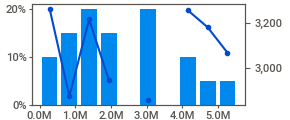
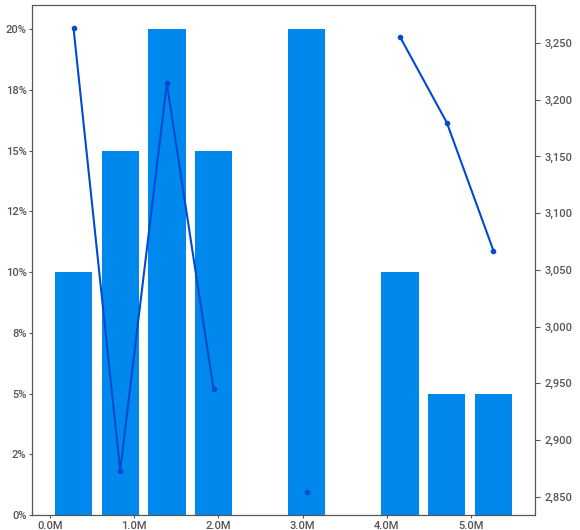
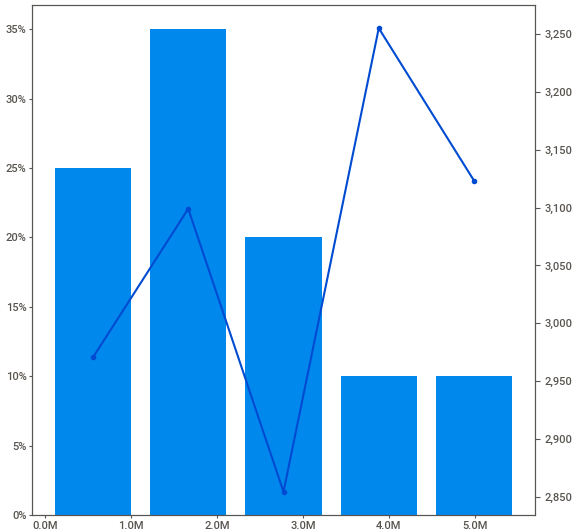
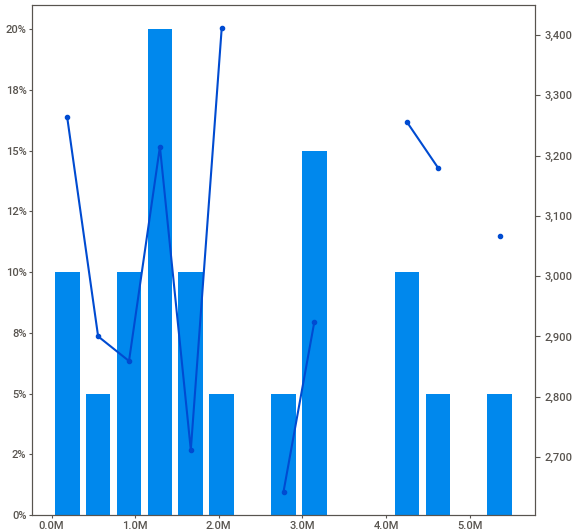
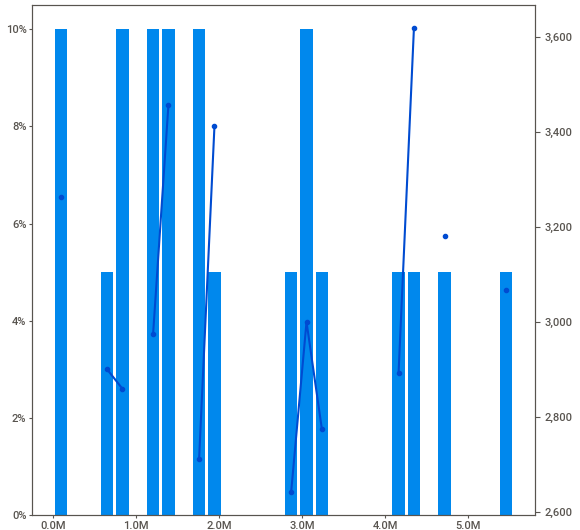
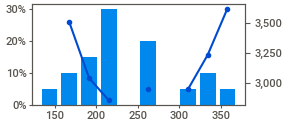
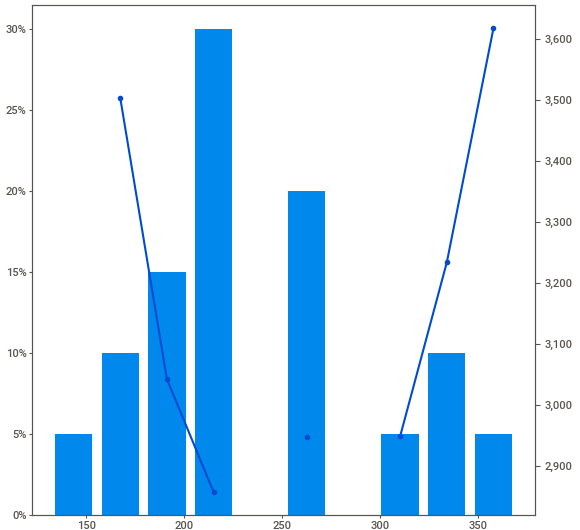
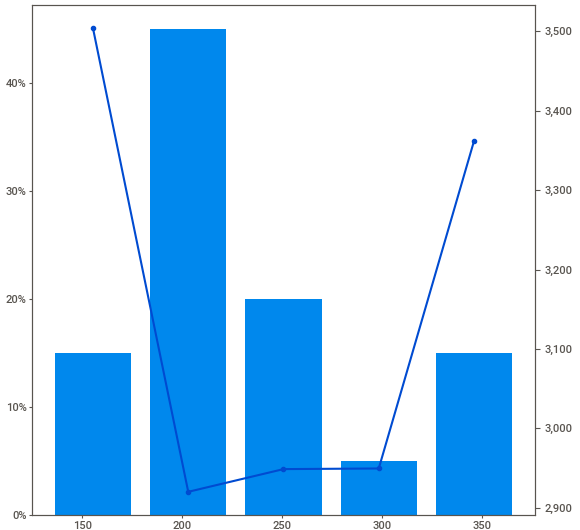
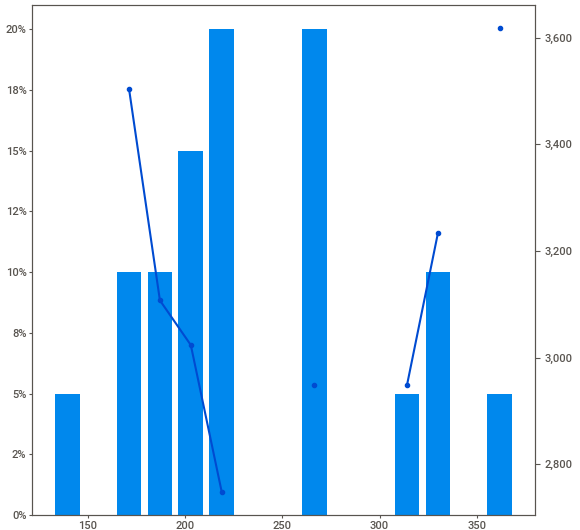
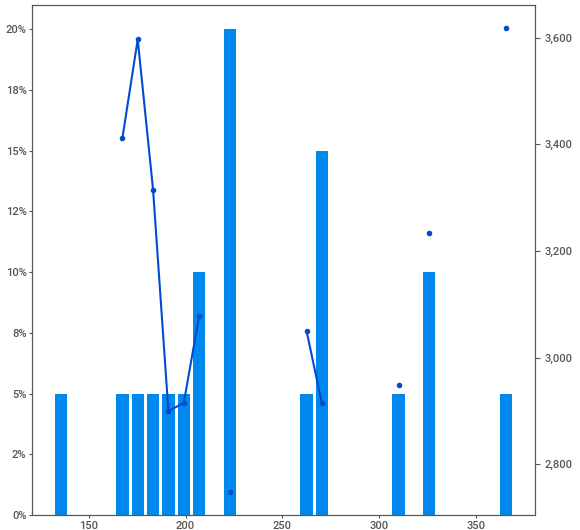
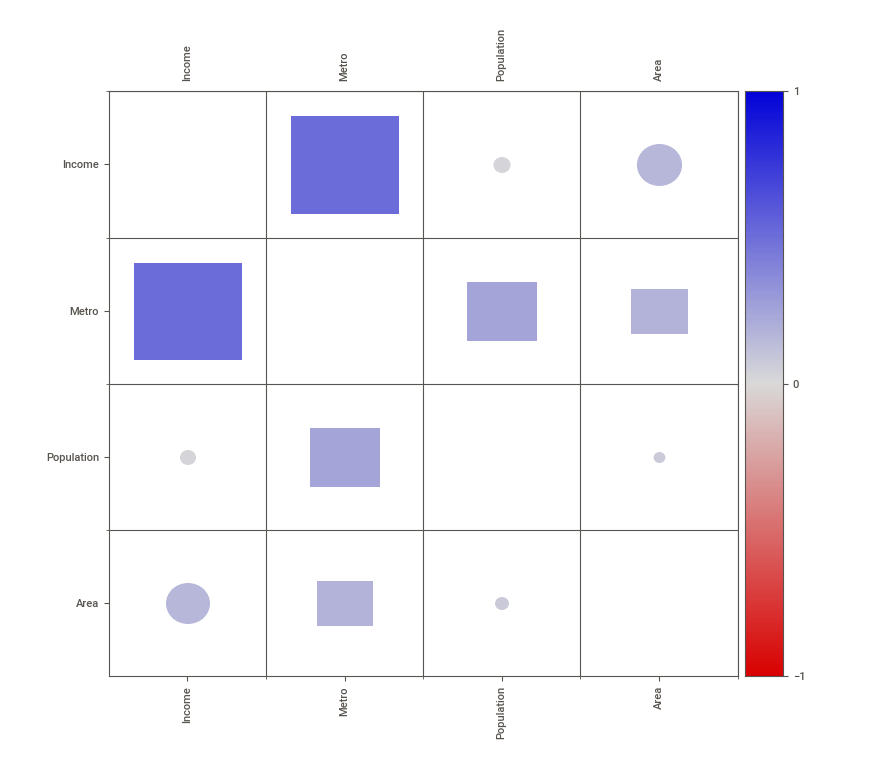
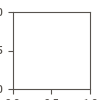

In [27]:
import sweetviz as sv
import warnings
warnings.filterwarnings('ignore')

report = sv.analyze(
    city_df,
    target_feat='Income'
)
report.show_notebook()

In [28]:
import ydata_profiling  as pf

rpt = pf.ProfileReport(city_df,
                       title="City Report")
rpt.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Порівняння
- Sweetviz дозволяє одразу обрати цільову змінну, що може бути важливим при аналізі даних.
- Pandas Profiling дозволяє генерувати різні віджети звітів.
- Обидва пакети підходять для швидкого аналізу даних, але якщо потрібно заглиблюватись у деталі - краще все робити своїми руками під ті задачі, які стоять перед вами.